In [56]:
#first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 1. Load Data

In [57]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


All of the input variables that describe each patient are numerical.

Hence, load the file as a matrix of numbers using the NumPy function loadtxt().

There are eight input variables and one output variable (the last column). We will be learning a model to map rows of input variables (X) to an output variable (y), which we often summarize as y = f(X)

The variables can be summarized as follows:

**Input Variables (X):**

0. Number of times pregnant
1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
2. Diastolic blood pressure (mm Hg)
3. Triceps skin fold thickness (mm)
4. 2-Hour serum insulin (mu U/ml)
5. Body mass index (weight in kg/(height in m)^2)
6. Diabetes pedigree function
7. Age (years)
**Output Variables (y):**

8. Class variable (0 or 1)

In [58]:
X = df.iloc[:,0:8]
y = df.iloc[:,-1]

In [59]:
X_scaled = scale(X) 
print('Scaled_X:\n', X_scaled)

Scaled_X:
 [[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [60]:
# Split dataset into 'train' & 'test' sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [61]:
y_train=np_utils.to_categorical(y_train)
print('y_train encoded:\n',y_train)

y_train encoded:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


# 2. Define Keras Model
The model design:


*   3 layers.

* 22 total neurons.

*  Relu & Sigmoid activation functions.








In [62]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# 3. Compile Keras Model

In [63]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. Fit Keras Model

In [64]:
# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_split=0.3, epochs=150, batch_size=10)
#model.fit(X, y, epochs=150, batch_size=10, verbose=0)

Epoch 1/150
36/36 [==============================] - 1s 5ms/step - loss: 0.6643 - accuracy: 0.6574 - val_loss: 0.6521 - val_accuracy: 0.6710
Epoch 2/150
36/36 [==============================] - 0s 3ms/step - loss: 0.6362 - accuracy: 0.6769 - val_loss: 0.6268 - val_accuracy: 0.6774
Epoch 3/150
36/36 [==============================] - 0s 3ms/step - loss: 0.6055 - accuracy: 0.6936 - val_loss: 0.5964 - val_accuracy: 0.6839
Epoch 4/150
36/36 [==============================] - 0s 3ms/step - loss: 0.5732 - accuracy: 0.7019 - val_loss: 0.5674 - val_accuracy: 0.6839
Epoch 5/150
36/36 [==============================] - 0s 4ms/step - loss: 0.5428 - accuracy: 0.7242 - val_loss: 0.5456 - val_accuracy: 0.7161
Epoch 6/150
36/36 [==============================] - 0s 3ms/step - loss: 0.5194 - accuracy: 0.7298 - val_loss: 0.5293 - val_accuracy: 0.7161
Epoch 7/150
36/36 [==============================] - 0s 4ms/step - loss: 0.5013 - accuracy: 0.7493 - val_loss: 0.5162 - val_accuracy: 0.7290
Epoch 8/150
3

# 5. Evaluate Model

In [65]:
# evaluate the keras model
_,accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))


17/17 [==============================] - 0s 1ms/step - loss: 0.3810 - accuracy: 0.8346
Accuracy: 83.46


# 6. Predictions

In [66]:
# make class predictions with the model
predictions = np.argmax(model.predict(X_test), axis=-1)
# summarize the first 5 cases
for i in range(10):
    print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], y[i]))

8/8 [==============================] - 0s 2ms/step
[0.6399472601593604, -0.7165334717264664, -0.5741277459136239, 0.7818138030884986, 0.9568596530309466, 0.2547804694892914, -0.12647140206047627, 0.8303811324799334] => 0 (expected 1)
[-0.5479185907225461, -0.2783734371474431, 0.30473400231574344, 0.7190857419965673, -0.6928905722954675, 0.4705431865971717, -0.9781448690748651, -1.0415494364835023] => 0 (expected 0)
[-0.5479185907225461, -0.4035620184557355, -0.2639412465385531, -1.2882122129452358, -0.6928905722954675, -0.1513611156549531, -0.9479436823013052, -1.0415494364835023] => 0 (expected 1)
[1.2338801856003137, -0.4348591637828086, 0.5632227517949692, -1.2882122129452358, -0.6928905722954675, -0.938260436871927, 1.160099154493175, 0.06459135426761875] => 0 (expected 0)
[0.9369137228798371, 0.4727580507023112, 1.0802002507534205, -1.2882122129452358, -0.6928905722954675, -0.26558843647677216, -0.7908975110787937, 1.4259954044228447] => 0 (expected 1)
[0.6399472601593604, -0.5600

In [67]:
y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1) 

accuracy_score(y_test, y_pred)

8/8 [==============================] - 0s 2ms/step


0.7283464566929134

In [68]:
print(model.metrics_names)

['loss', 'accuracy']


One of the default callbacks that is registered when training all deep learning models is the History callback. It records training metrics for each epoch. This includes the loss and the accuracy (for classification problems) as well as the loss and accuracy for the validation dataset, if one is set.

The history object is returned from calls to the fit() function used to train the model. Metrics are stored in a dictionary in the history member of the object returned.

In [69]:

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# 7. Plot against loss and accuracy
The plots can provide an indication of useful things about the training of the model, such as:

*   It’s speed of convergence over epochs (slope).
*  Whether the model may have already converged (plateau of the line).

*   Whether the mode may be over-learning the training data (inflection for validation line).







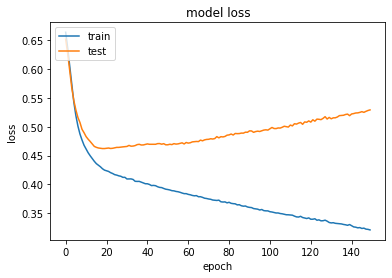

In [70]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

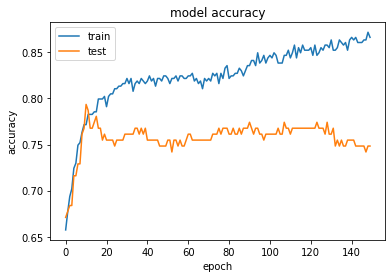

In [71]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()